In [27]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import VimeoVideo
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [9]:
#6.2. Clustering with Two Features

#In the previous lesson, you explored data from the Survey of Consumer Finances (SCF), paying special attention to households that have been turned down for credit or feared being denied credit. 
#In this lesson, we'll build a model to segment those households into distinct clusters, and examine the differences between those clusters.


In [12]:
#task 6.2.1: Create a wrangle function that takes a path of a CSV file as input, reads the file into a DataFrame, subsets the data to households that have been turned down for credit or feared being denied credit in the past 5 years (see "TURNFEAR"), and returns the subset DataFrame.

In [4]:
#Task 6.2.2: Use your wrangle function to read the file survey of consumer finace 2022 .csv. into a DataFrame named df.#

def wrangle(filepath):
    df=pd.read_csv(filepath)
    mask= df["TURNFEAR"]==1
    df=df[mask]
    
    return df

In [14]:
#Task 6.2.2: Use your wrangle function to read the file SCFP2019.csv.gz into a DataFrame named df.

In [5]:
df = wrangle("\\Users\\User\\survey of consumer finace 2022/survey of consumer finance.csv")
print(df.shape)
df.head()

(3839, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2


In [17]:
#Explore
#We looked at a lot of different features of the "TURNFEAR" subset in the last lesson, and the last thing we looked at was the relationship between real estate and debt. To refresh our memory on what that relationship looked like, let's make that graph again.

In [18]:
#Task 6.2.3: Create a scatter plot of that shows the total value of primary residence of a household ("HOUSES") as a function of the total value of household debt ("DEBT").
#Be sure to label your x-axis as "Household Debt", your y-axis as "Home Value", and use the title "Credit Fearful: Home Value vs. Household Debt".

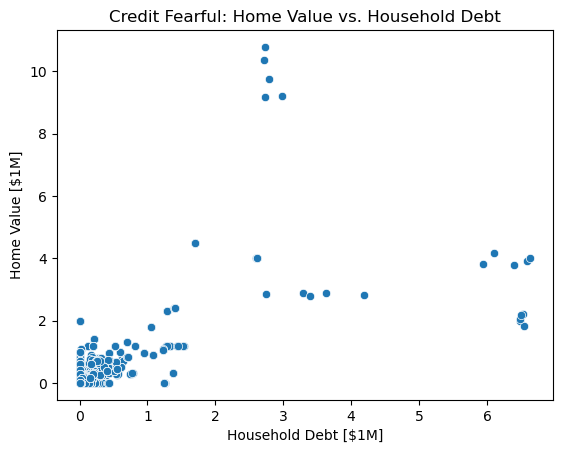

In [6]:
# Plot "HOUSES" vs "DEBT"
sns.scatterplot(x=df["DEBT"] /1e6, y=df["HOUSES"]/1e6)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [1]:
#Remember that graph and its clusters? Let's get a little deeper into it.

#Split
#We need to split our data, but we're not going to need target vector or a test set this time around.
#That's because the model we'll be building involves unsupervised learning. 
#It's called unsupervised because the model doesn't try to map input to a set of labels or targets that already exist. It's kind of like how humans learn new skills, 
#in that we don't always have models to copy. Sometimes, we just try out something and see what happens. 
#Keep in mind that this doesn't make these models any less useful, it just makes them different.

#So, keeping that in mind, let's do the split.

In [7]:
#Task 6.2.4: Create the feature matrix X. It should contain two features only: "DEBT" and "HOUSES"


X = df[["DEBT", "HOUSES"]]
print(X.shape)
X.head()

(3839, 2)


,DEBT,HOUSES
20,11000,0
21,10000,0
22,10000,0
23,10000,0
24,11000,0


In [8]:
#Before we start building the model, let's take a second to talk about something called KMeans.

#Take another look at the scatter plot we made at the beginning of this lesson. 
#Remember how the datapoints form little clusters? It turns out we can use an algorithm that partitions the dataset into smaller groups.

#Let's take a look at how those things work together.

In [9]:
#6.2.5 to 6.2.6 does not really count

#Iterate
#Now that you've had a chance to play around with the process a little bit, let's get into how to build a model that does the same thing.
#Task 6.2.7: Build a KMeans model, assign it to the variable name model, and fit it to the training data X.
#Tip: The k-means clustering algorithm relies on random processes, so don't forget to set a random_state for all your models in this lesson

In [10]:
# Build model
model = KMeans(n_clusters=3, random_state=42)
# Fit model to data
model.fit(X)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [11]:
#And there it is. 42 datapoints spread across three clusters. Let's grab the labels that the model has assigned to the data points so we can start making a new visualization.

In [12]:
#Task 6.2.8: Extract the labels that your model created during training and assign them to the variable labels
labels = model.labels_
labels[:10]

#labelling is done to  to see those cluster our model has assign each of  the data point

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
#Using the labels we just extracted, let's recreate the scatter plot from before, this time we'll color each point according to the cluster to which the model assigned it.

In [14]:
#Task 6.2.9: Recreate the "Home Value vs. Household Debt" scatter plot you made above, but with two changes.
#First, use seaborn to create the plot. Second, pass your labels to the hue argument, and set the palette argument to "deep".

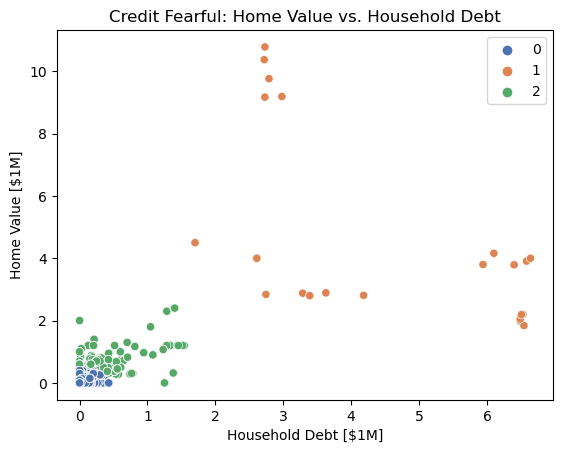

In [15]:
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(
    x=df["DEBT"] /1e6, 
    y=df["HOUSES"]/1e6,
    hue=labels,
    palette="deep"
)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [16]:
#Nice! Each cluster has its own color. The centroids are still missing, so let's pull those out.

In [17]:
#Task 6.2.10: Extract the centroids that your model created during training, and assign them to the variable centroids.

In [18]:
centroids = model.cluster_centers_
centroids

array([[  43913.12611012,   42421.25518058],
       [3897703.33333333, 4530666.66666667],
       [ 424616.2412993 ,  718336.42691415]])

In [19]:
# each row from above represent a cemtroidx and y coordinate of each centroid

In [20]:
#Task 6.2.11: Recreate the seaborn "Home Value vs. Household Debt" scatter plot you just made, but with one difference: 
#Add the centroids to the plot. Be sure to set the centroids color to "gray".

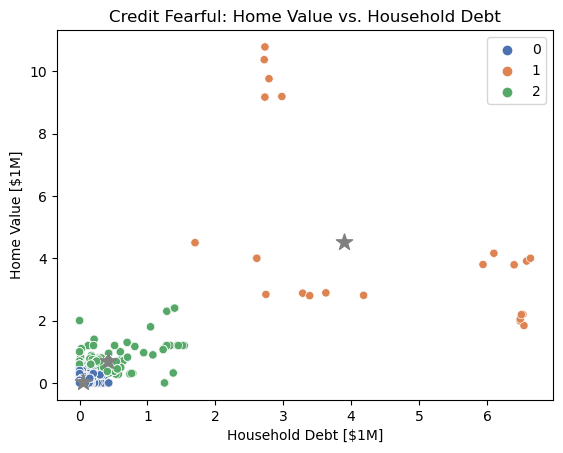

In [22]:
 #Plot "HOUSES" vs "DEBT", add centroids
sns.scatterplot(
    x=df["DEBT"] /1e6, 
    y=df["HOUSES"]/1e6,
    hue=labels,
    palette="deep"
)
plt.scatter(
    x=centroids[:, 0] /1e6,
    y=centroids[:, 1]/1e6,
    color="gray",
    marker="*", # marker =star
    s=150 # s=size
    
)

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [23]:
#That looks great, but let's not pat ourselves on the back just yet. 
#Even though our graph makes it look like the clusters are correctly assigned but, as data scientists, we need a numerical evaluation.
#The data we're using is pretty clear-cut, but if things were a little more muddled, we'd want to run some calculations to make sure we got everything right.

#There are two metrics that we'll use to evaluate our clusters. We'll start with inertia, which measure the distance between the points within the same cluster.
#
#

In [24]:
#Task 6.2.12: Extract the inertia for your model and assign it to the variable inertia
inertia = model.inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 475315192358408.9


In [25]:
#The "best" inertia is 0, and our score is pretty far from that. Does that mean our model is "bad?" Not necessarily. 
#Inertia is a measurement of distance (like mean absolute error from Project 2).
#This means that the unit of measurement for inertia depends on the unit of measurement of our x- and y-axes. 
#And since "DEBT" and "HOUSES" are measured in tens of millions of dollars, it's not surprising that inertia is so large.

#However, it would be helpful to have metric that was easier to interpret, and that's where silhouette score comes in. 
#Silhouette score measures the distance between different clusters. It ranges from -1 (the worst) to 1 (the best), so it's easier to interpret than inertia. WQU WorldQuant University Applied Data Science Lab QQQQ

In [30]:
#Task 6.2.13: Calculate the silhouette score for your model and assign it to the variable ss.

ss =silhouette_score(X, labels)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.7821383506051494


In [31]:
#Outstanding! 0.782 is pretty close to 1, so our model has done a good job at identifying 3 clusters that are far away from each other.

#It's important to remember that these performance metrics are the result of the number of clusters we told our model to create. 
#In unsupervised learning, the number of clusters is hyperparameter that you set before training your model. So what would happen if we change the number of clusters? 
#Will it lead to better performance? Let's try!

In [32]:
#Task 6.2.14: Use a for loop to build and train a K-Means model where n_clusters ranges from 2 to 12 (inclusive).
#Each time a model is trained, calculate the inertia and add it to the list inertia_errors, then calculate the silhouette score and add it to the list silhouette_scores

In [33]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model=KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, model.labels_))
    
    


print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_k

Inertia: [705340367647918.4, 475315192358408.9, 297915513890075.0, 190463085682281.66, 136753369087901.08, 113372629735149.11, 94240543838593.53, 80269730334411.88, 68358480371802.62, 61004147973687.28, 49207527426622.85]

Silhouette Scores: [0.951905651526154, 0.7821383506051494, 0.7837672544244059, 0.7758894606695186, 0.7561003647497938, 0.7242389613461061, 0.724662733130971, 0.7078697753107195, 0.707709269547229, 0.7154819418172015, 0.7139747291376894]


In [34]:
#Now that we have both performance metrics for several different settings of n_clusters, 
#let's make some line plots to see the relationship between the number of clusters in a model and its inertia and silhouette scores.

In [35]:
#Task 6.2.15: Create a line plot that shows the values of inertia_errors as a function of n_clusters.
#Be sure to label your x-axis "Number of Clusters", your y-axis "Inertia", and use the title "K-Means Model: Inertia vs Number of Clusters".

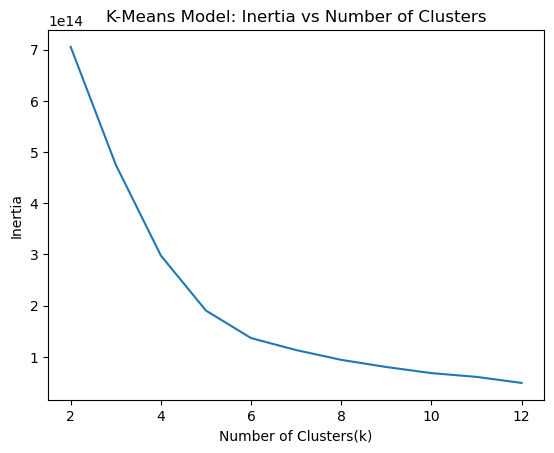

In [36]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

In [37]:
#What we're seeing here is that, as the number of clusters increases, inertia goes down. 
#In fact, we could get inertia to 0 if we told our model to make 4,623 clusters (the same number of observations in X), but those clusters wouldn't be helpful to us.

#The trick with choosing the right number of clusters is to look for the "bend in the elbow" for this plot. In other words, we want to pick the point where the drop in inertia becomes less dramatic and the line begins to flatten out. In this case, it looks like the sweet spot is 4 or 5.

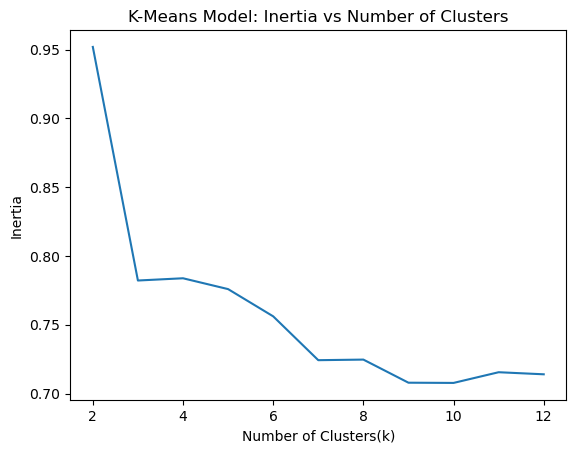

In [39]:
#Let's see what the silhouette score looks like.# Plot `silhouette_scores` vs `n_clusters`
#Task 6.2.16: Create a line plot that shows the values of silhouette_scores as a function of n_clusters. 
#Be sure to label your x-axis "Number of Clusters", your y-axis "Silhouette Score", and use the title "K-Means Model: Silhouette Score vs Number of Clusters"
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");


In [40]:
#What we're seeing here is that, as the number of clusters increases, inertia goes down. 
#In fact, we could get inertia to 0 if we told our model to make 4,623 clusters (the same number of observations in X), but those clusters wouldn't be helpful to us.

#The trick with choosing the right number of clusters is to look for the "bend in the elbow" for this plot. In other words, we want to pick the point where the drop in inertia becomes less dramatic and the line begins to flatten out. In this case, it looks like the sweet spot is 3 or 5.

In [41]:

#Task 6.2.16: Create a line plot that shows the values of silhouette_scores as a function of n_clusters.
#Be sure to label your x-axis "Number of Clusters", your y-axis "Silhouette Score", and use the title "K-Means Model: Silhouette Score vs Number of Clusters".

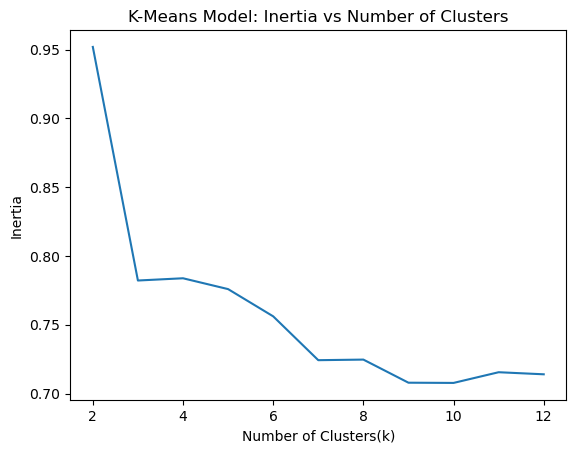

In [42]:
 #Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");


In [43]:
#Note that, in contrast to our inertia plot, bigger is better. 
#So we're not looking for a "bend in the elbow" but rather a number of clusters for which the silhouette score still remains high. We can see that silhouette score drops drastically beyond 4 clusters. Given this and what we saw in the inertia plot, it looks like the optimal number of clusters is 4.

#Now that we've decided on the final number of clusters, let's build a final model.

In [47]:
#task 6.2.17: Build and train a new k-means model named final_model. 
#Use the information you gained from the two plots above to set an appropriate value for the n_clusters argument. 
#Once you've built and trained your model, submit it to the grader for evaluation.


# Build model
final_model = KMeans(n_clusters=4, random_state=42)
final_model.fit(X)
# Fit model to data

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

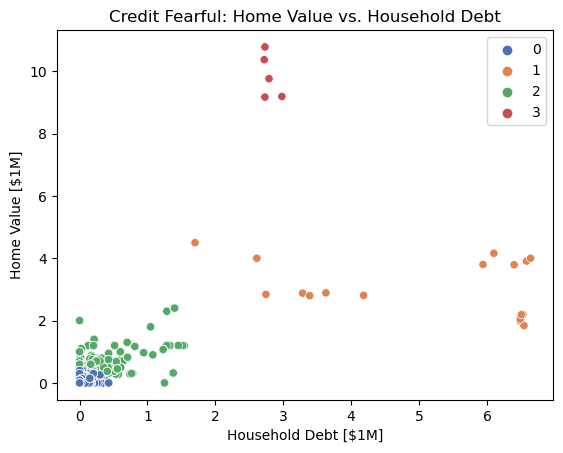

In [48]:
#Task 6.2.18: Create one last "Home Value vs. Household Debt" scatter plot that shows the clusters that your final_model has assigned to the training data.
# Plot "HOUSES" vs "DEBT" with final_model labels
sns.scatterplot(
    x=df["DEBT"] /1e6,
    y=df["HOUSES"]/1e6,
    hue=final_model.labels_,
    palette="deep"
    
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [49]:
#Nice! You can see all four of our clusters, each differentiated from the rest by color.

#We're going to make one more visualization, converting the cluster analysis we just did to something a little more actionable: a side-by-side bar chart. 
#In order to do that, we need to put our clustered data into a DataFrame.


In [54]:
#Task 6.2.19: Create a DataFrame xgb that contains the mean "DEBT" and "HOUSES" values for each of the clusters in your final_model.
xgb = X.groupby(final_model.labels_).mean()
xgb

#0,1,2,3 REPRESENT THE FOUR CLUSTER

,DEBT,HOUSES
0,4.391313e+04,4.242126e+04
1,4.119400e+06,3.466000e+06
2,4.246162e+05,7.183364e+05
3,2.789220e+06,9.854000e+06


In [51]:
#Before you move to the next task, print out the cluster_centers_ for your final_model.
#Do you see any similarities between them and the DataFrame you just made? Why do you think that is?

In [52]:
#Task 6.2.20: Create a side-by-side bar chart from xgb that shows the mean "DEBT" and "HOUSES" values for each of the clusters in your final_model. 
#For readability, you'll want to divide the values in xgb by 1 million. Be sure to label the x-axis "Cluster", the y-axis "Value [$1 million]", and use the title "Mean Home Value & Household Debt by Cluster"

<Axes: title={'center': 'proportion, Debt/Home'}, xlabel='Cluster', ylabel='proportion, Debt/Home'>

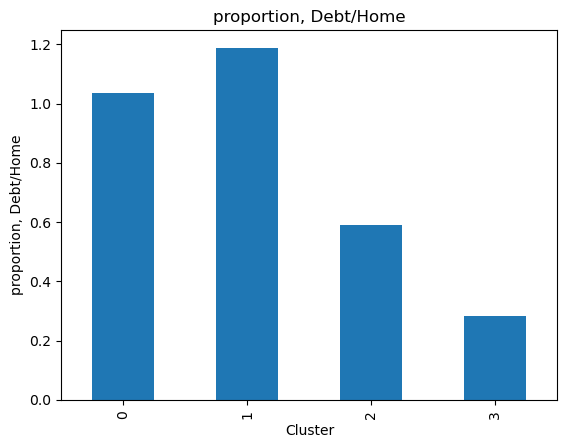

In [55]:
(xgb["DEBT"] /xgb["HOUSES"]).plot(
    kind="bar",
    xlabel="Cluster",
    ylabel="proportion, Debt/Home",
    title="proportion, Debt/Home"
)  

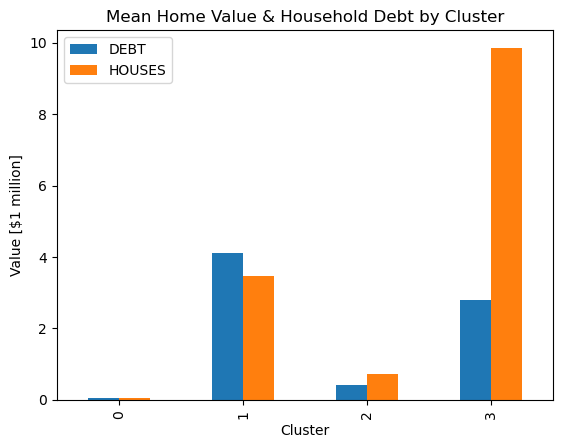

In [53]:
# Create side-by-side bar chart of `xgb`
(xgb/1e6).plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");


# 1 most of their depth comes from their home

In [ ]:
#in this plot, we have our four clusters spread across the x-axis, and the dollar amounts for home value and household debt on the y-axis.

#The first thing to look at in this chart is the different mean home values for the five clusters. Clusters 0 represents households with small to moderate home values, clusters 2 and 3 have high home values, and cluster 1 has extremely high values.

#The second thing to look at is the proportion of debt to home value. In clusters 1 and 3, this proportion is around 0.5. This suggests that these groups have a moderate amount of untapped equity in their homes. But for group 0, it's almost 1, which suggests that the largest source of household debt is their mortgage. Group 2 is unique in that they have the smallest proportion of debt to home value, around 0.4.

#This information could be useful to financial institution that want to target customers with products that would appeal to them. For instance, households in group 0 might be interested in refinancing their mortgage to lower their interest rate. Group 2 households could be interested in a home equity line of credit because they have more equity in their homes. And the bankers, Bill Gates, and Beyoncés in group 1 might want white-glove personalized wealth management.